# Scikit-learn's estimator interface

Scikit-learn strives to have a uniform interface across all methods. Given a scikit-learn *estimator*
object named `model`, the following methods are available (not all for each model):

- Available in **all Estimators**
  + `model.fit()` : fit training data. For supervised learning applications,
    this accepts two arguments: the data `X` and the labels `y` (e.g. `model.fit(X, y)`).
    For unsupervised learning applications, `fit` takes only a single argument,
    the data `X` (e.g. `model.fit(X)`).
- Available in **supervised estimators**
  + `model.predict()` : given a trained model, predict the label of a new set of data.
    This method accepts one argument, the new data `X_new` (e.g. `model.predict(X_new)`),
    and returns the learned label for each object in the array.
  + `model.predict_proba()` : For classification problems, some estimators also provide
    this method, which returns the probability that a new observation has each categorical label.
    In this case, the label with the highest probability is returned by `model.predict()`.
  + `model.decision_function()` : For classification problems, some estimators provide an uncertainty estimate that is not a probability. For binary classification, a decision_function >= 0 means the positive class will be predicted, while < 0 means the negative class.
  + `model.score()` : for classification or regression problems, most (all?) estimators implement
    a score method.  Scores are between 0 and 1, with a larger score indicating a better fit. For classifiers, the `score` method computes the prediction accuracy. For regressors, `score` computes the coefficient of determination (R<sup>2</sup>) of the prediction.
  + `model.transform()` : For feature selection algorithms, this will reduce the dataset to the selected features. For some classification and regression models such as some linear models and random forests, this method reduces the dataset to the most informative features. These classification and regression models can therefore also be used as feature selection methods.
  
- Available in **unsupervised estimators**
  + `model.transform()` : given an unsupervised model, transform new data into the new basis.
    This also accepts one argument `X_new`, and returns the new representation of the data based
    on the unsupervised model.
  + `model.fit_transform()` : some estimators implement this method,
    which more efficiently performs a fit and a transform on the same input data.
  + `model.predict()` : for clustering algorithms, the predict method will produce cluster labels for new data points. Not all clustering methods have this functionality.
  + `model.predict_proba()` : Gaussian mixture models (GMMs) provide the probability for each point to be generated by a given mixture component.
  + `model.score()` : Density models like KDE and GMMs provide the likelihood of the data under the model.

Apart from ``fit``, the two most important functions are arguably ``predict`` to produce a target variable (a ``y``) ``transform``, which produces a new representation of the data (an ``X``).
The following table shows for which class of models which function applies:

<table>
<tr style="border:None; font-size:20px; padding:10px;"><th>``model.predict``</th><th>``model.transform``</th></tr>
<tr style="border:None; font-size:20px; padding:10px;"><td>Classification</td><td>Preprocessing</td></tr>
<tr style="border:None; font-size:20px; padding:10px;"><td>Regression</td><td>Dimensionality Reduction</td></tr>
<tr style="border:None; font-size:20px; padding:10px;"><td>Clustering</td><td>Feature Extraction</td></tr>
<tr style="border:None; font-size:20px; padding:10px;"><td>&nbsp;</td><td>Feature Selection</td></tr>

</table>

In [4]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier


iris = load_iris()
X, y = iris.data, iris.target

classifier = KNeighborsClassifier()

In [6]:
from sklearn.model_selection import cross_val_score

# By default, cross_val_score uses cv=3
scores = cross_val_score(classifier, X, y, cv=5)
print(scores)
print(np.mean(scores))

[ 0.96666667  1.          0.93333333  0.96666667  1.        ]
0.973333333333


Others crossvalidation

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import KFold, StratifiedKFold, ShuffleSplit

def plot_cv(cv, features, labels):
    masks = []
    for train, test in cv.split(features, labels):
        mask = np.zeros(len(labels), dtype=bool)
        mask[test] = 1
        masks.append(mask)
    
    plt.matshow(masks, cmap='gray_r')

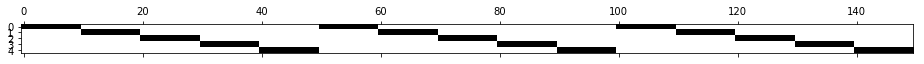

In [12]:
plot_cv(StratifiedKFold(n_splits=5), iris.data, iris.target)

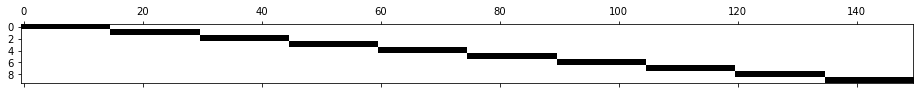

In [13]:
plot_cv(KFold(n_splits=10), iris.data, iris.target)

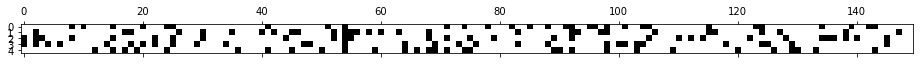

In [14]:
plot_cv(ShuffleSplit(n_splits=5, test_size=.2), iris.data, iris.target)

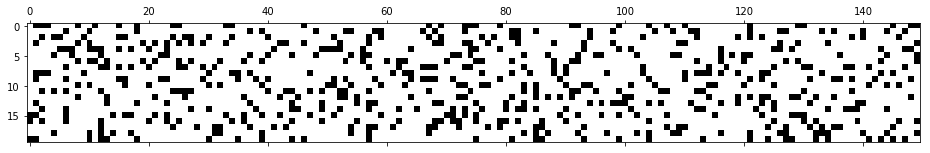

In [15]:
plot_cv(ShuffleSplit(n_splits=20, test_size=.2), iris.data, iris.target)